In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
k=3
neg,avs,avf,ri = np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8))
i=0
for m in range(k+1, k+9):
    j=0
    for n in range(k+1, k+9):
        filename = 'data/k{0}_r/m{1}_n{2}.npy'.format(str(k), str(m), str(n))
        dnm = np.load(filename)
        diff = dnm[:,0] - dnm[:,1]
        neg[i,j] = np.sum(diff<0)
        avs[i,j] = np.mean(dnm[:,0])
        avf[i,j] = np.mean(dnm[:,1])
        ri[i,j] = (avs[i,j] - avf[i,j]) / avs[i,j]
        j+=1
    i+=1

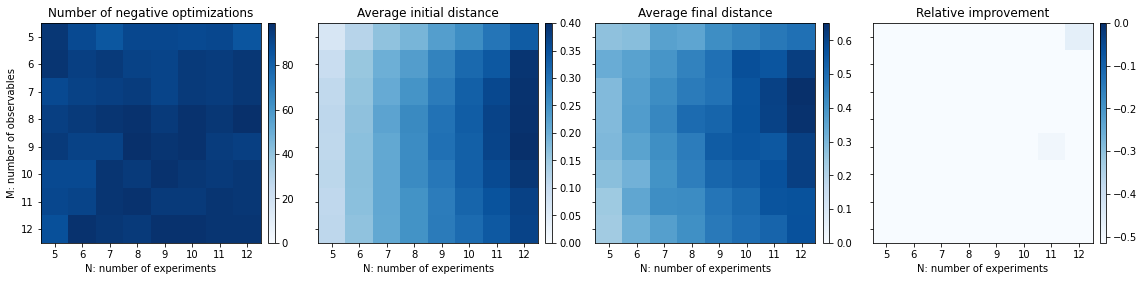

In [3]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=0, vmax=np.max(neg))
ax[0].set_title('Number of negative optimizations')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=0, vmax=np.max(avs))
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=0, vmax=np.max(avf))
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=0, vmax=np.max(ri))
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('M: number of observables');
iml = [im0,im1,im2,im3]
for i in range(4):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(5+np.arange(0,8))
    a.set_yticklabels(5+np.arange(0,8));
    a.set_xlabel('N: number of experiments')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()